In [5]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
import mglearn
from scipy.cluster import hierarchy

# pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

## Clustering


Le Clustering se réfère à un ensemble très large de techniques pour trouver des sous-groupes, ou grappes, dans un ensemble de données.

Lorsque nous regroupons les observations d’un ensemble de données, nous cherchons à les __**diviser en groupes distincts**__ afin que les observations au sein de chaque groupe soient assez _**semblables**_ les unes aux autres.

une considération spécifique au domaine qui doit être fondée sur la connaissance des données étudiées.

## Dans le domaine médical

Par exemple, on fait des prélèvements de $ n $ tissus d’un poumon atteint de cancers, ces tissus ont $ p $ caractéristiques qui peuvent être l’expression génétique par exemple. On croit alors, qu’il existe une hétérogénéité parmi ces $ n $ tissus. Ces hétérogénéités peuvent être des types de cancers par exemple.

## Dans le domaine du marketing

Par exemple, nous avons accès à une grande base de données, où on retrouve les caractéristiques des clients; le revenu moyen, les dépenses mensuelles chez Costco, l’emploi du client... etc.) Le but est de trouver une segmentation du marché afin de cibler certains clients qui sont plus réceptifs à certaines publicités d’un produit particulier. 

## En assurance automobile

Supposons que nous avons $n$ observations avec chacune $p$ caractéristique. Chaque observation peut être une police d'assurance d'un assuré ayant $p$ caractéristiques, tels que son âge, sa profession, la marque de voiture qu'il conduit ou la puissance de motorisation de cette dernière.

On pourrait s'intéresser à créer des groupes d'assurés par leurs caractéristiques (Bon, moyen ou mauvais conducteur).  

Dans notre cas, on s'intéresse plutôt à créer des groupes à l'intérieur des variables (caractéristique de l'assuré).

# deux méthodes


### 1) K-means clustering
Nous cherchons à diviser les observations en un nombre prédéterminé de sous-groupes.

### 2) Hierarchical clustering
Nous ne savons pas d'avance combien de sous-groupes nous voulons.

# K-means

_K-means clustering_ est une approche simple afin de diviser les données en K sous-groupes distincts. 

Nous devons d'abord spécifier le nombre de $k$ _cluster_

Ensuite  l'algorithme _K-means_ assigne chaque observation à exactement un des $k$ _cluster_.

## Algorithm _K-means clustering_

1. Assigner aléatoirement chaque point de donné à un _cluster_ de 1 à $C_k$

2. **Repeat**
 - Pour chaque cluster $C_k$, on calcule le centroid
 - Assigner chaque observation $x_i$ au _cluster $C_k$ dont le centroid est le plus proche

3. **Until:** jusqu'à ce qu'a ce que l'assignation de cluster ne change plus

### Illustration:

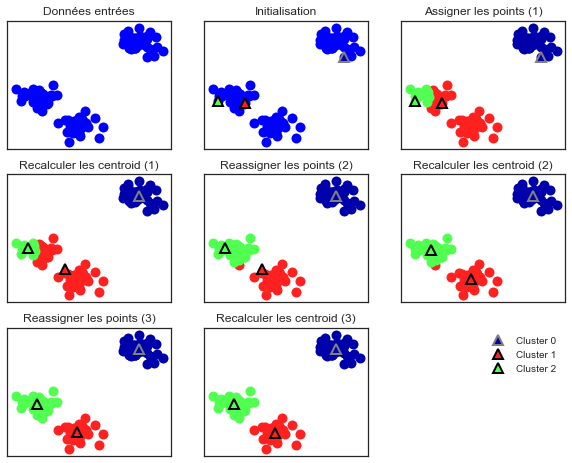

In [2]:
 mglearn.plots.plot_kmeans_algorithm()

## Nous pouvons voir les frontières des clusters assignés

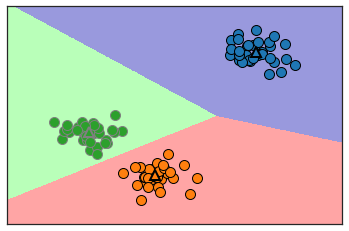

In [6]:
mglearn.plots.plot_kmeans_boundaries()

### Illutration animée

![cluster](https://miro.medium.com/max/960/1*umzqxI8Oeje8nU5EItF5dw.gif)

# Exemple

Créons 200 points iid distribués aléatoirement $\sim \mathcal{N}(0,1)$

In [7]:
np.random.seed(2)
X = np.random.standard_normal((200,2))
X[:100,0] = X[:100,0]+3
X[:100,1] = X[:100,1]-4

### nous créons deux _clusters_

In [8]:
km2 = KMeans(n_clusters=2, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### nous créons trois _clusters_

In [9]:
np.random.seed(4)
km3 = KMeans(n_clusters=3, n_init=20)
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### nous créons quatre _clusters_

In [10]:
np.random.seed(4)
km4 = KMeans(n_clusters=4, n_init=20)
km4.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Reproduisons l'exemple du livre

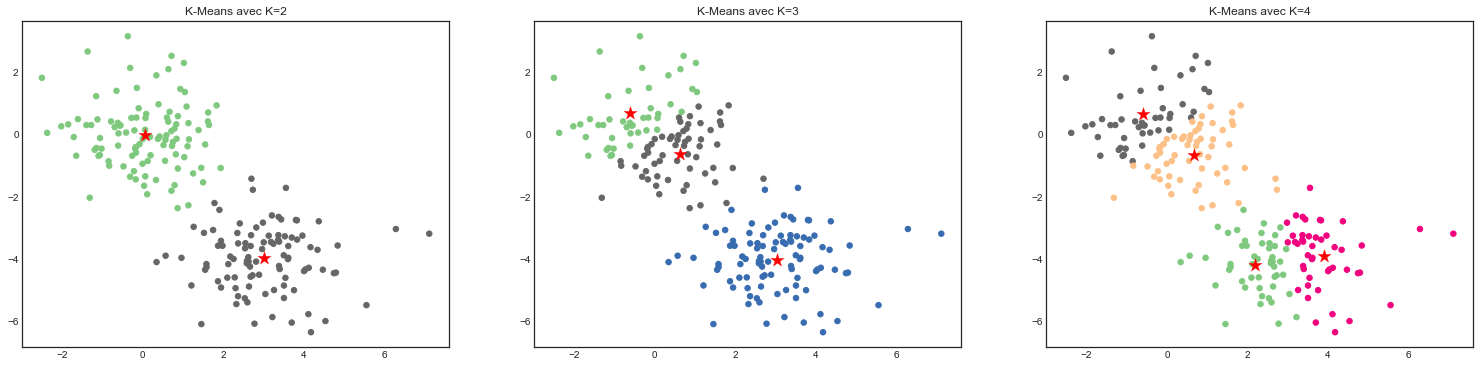

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(26,6))

ax1.scatter(X[:,0], X[:,1], s=30, c=km2.labels_, cmap=plt.cm.Accent) 
ax1.set_title('K-Means avec K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='*', s=200, c='r', linewidth=.2)

ax2.scatter(X[:,0], X[:,1], s=30, c=km3.labels_, cmap=plt.cm.Accent) 
ax2.set_title('K-Means avec K=3')
ax2.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], marker='*', s=200, c='r', linewidth=.2);

ax3.scatter(X[:,0], X[:,1], s=30, c=km4.labels_, cmap=plt.cm.Accent) 
ax3.set_title('K-Means avec K=4')
ax3.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], marker='*', s=200, c='r', linewidth=.2);

On peut trouver la valeur des centroids

In [12]:
km4.cluster_centers_

array([[ 2.19299733, -4.18122464],
       [ 0.68281024, -0.65238891],
       [ 3.90825093, -3.89348124],
       [-0.59716407,  0.65024368]])

In [9]:
km4.cluster_centers_[:,1]

array([ 0.68587578, -0.61648951, -3.82699821, -4.21757161])

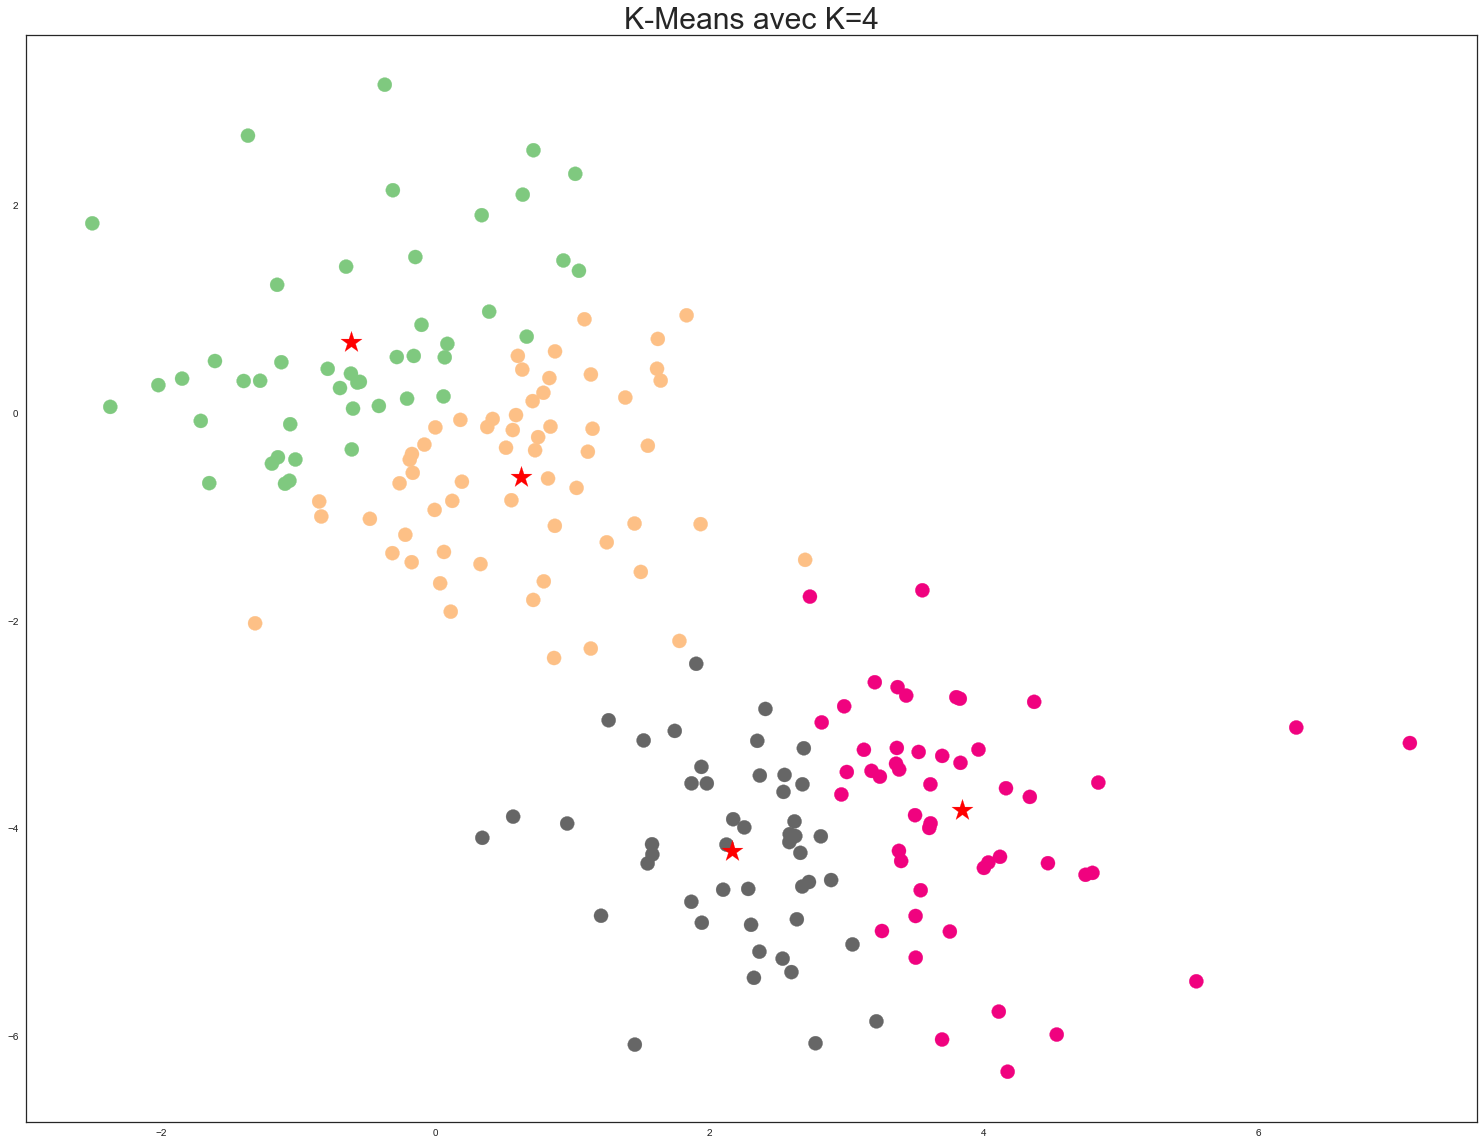

In [10]:
fig, (ax3) = plt.subplots(1,1, figsize=(26,20))
ax3.scatter(X[:,0], X[:,1], s=200, c=km4.labels_, cmap=plt.cm.Accent) 
ax3.set_title('K-Means avec K=4', fontsize=30)
ax3.scatter(km4.cluster_centers_[:,0], 
            km4.cluster_centers_[:,1], marker='*', s=500, c='r', 
            linewidth=.2);

Durant l'algorithme, chaque point est assigné à un cluster $k$. Nous pouvons identifier à quel _cluster_ $k$ le point $x_i$ apparient comme suit:

In [11]:
print("Cluster memberships:\n{}".format(km4.labels_))

Cluster memberships:
[3 1 3 2 3 2 3 2 2 3 3 2 3 3 3 2 3 2 2 2 3 1 2 2 3 2 3 2 3 3 3 2 3 3 2 3 3
 3 3 2 3 2 3 2 3 2 2 3 2 2 2 3 1 2 3 3 3 3 3 2 3 3 2 2 2 3 3 2 3 2 3 3 2 2
 2 2 3 2 2 2 3 3 2 2 2 2 2 3 2 3 2 3 2 3 2 2 3 1 2 2 0 0 1 0 0 0 1 0 0 1 0
 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0]


L'algorithme alterne entre deux étapes: assigner chaque point de données au centre de cluster le plus proche, puis définir chaque centre de cluster comme la moyenne des points de données qui lui sont affectés. L'algorithme cesse lorsque l'affectation des points de données aux clusters ne change plus.

#### Ceci doit satisfaire aux deux propriétés suivantes:

$C_1 \cup C_2 \cup \dots  \cup C_k = \{1, \dots,n \} $ chaque observation doit appartenir à au moins un des $K$ cluster

$C_k \cap C_{k^{'}}=\emptyset$ pour tout $k \neq k^{'}$ chaque observation appartient à un et un seul _cluster_

Si les la $i$eme observation appartient au $k$eme _cluster_, alors $i \in C_k$. L'idée est de réduire la variation entre les points de données aussi petite que possible.  

Cette réduction consiste à résoudre un problème d'optimisation dans l'équation (\ref{eq:km-min}) qui définit comme le K-means _clustering_,  


\begin{equation} \label{eq:km-min}
\underset{C_1, \dots, C_k}{\text{minimize}} \ \Bigg\{ \sum_{k=1}^K \frac{1}{|C_k|} \sum_{i, i\prime \in C_k} \sum_{j=1}^p \ (x_{ij}-x_{i\prime j})^2  \Bigg\}
\end{equation}


## Défaut de la méthode k-means:

La méthode k-means suppose que toutes les directions sont équiprobables.

Regardons un exemple où les données sont clairement séparés sur une diagonale:

Importons des données de scikit-learn:


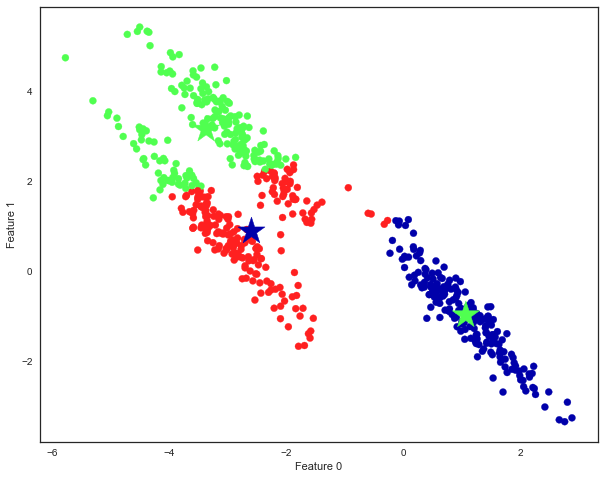

In [12]:
from sklearn.datasets import make_blobs
fig = plt.figure(figsize=(10, 8))
 # Génoron des clusters aléatoir ement
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transformons les données afin de les tirer obliquement
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# Regroupons les données en trois sous-groupe
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)      
# colorer les sous groupes et les centres
# figsize(26,20)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
# marker='*', c=[0, 1, 2], s=800, linewidth=.5, cmap=mglearn.cm3)
marker='*', c=[1, 0, 1], s=800, linewidth=.5, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

## Des formes complexes:


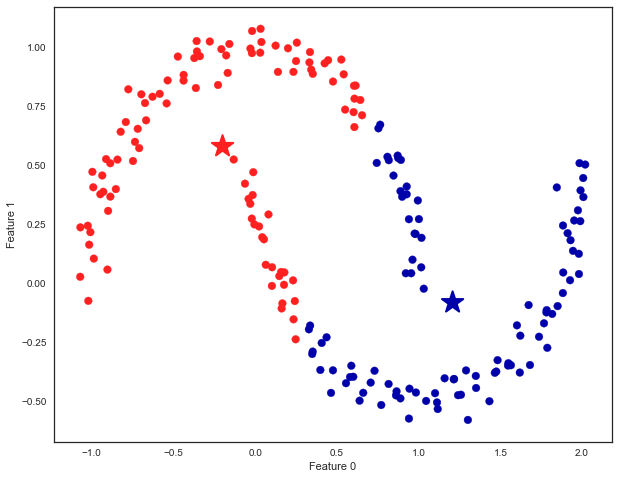

In [13]:
fig = plt.figure(figsize=(10, 8))
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)  
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='*', c=[mglearn.cm2(0), mglearn.cm2(1)], s=500, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");


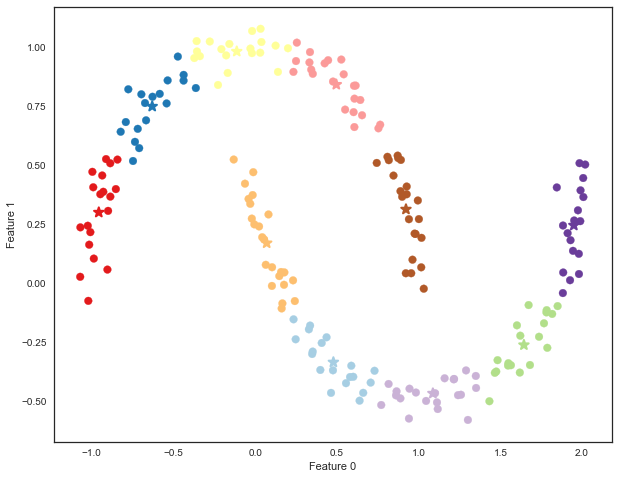

In [14]:
fig = plt.figure(figsize=(10, 8))
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100,
marker='*', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

Nous avons crée 10 _clusters_ , ce la veut dire que chaque point appartient à un cluster;  

$$x_i \in k_0, k_1, \dots, k_9$$

In [15]:
print("Cluster memberships:\n{}".format(y_pred))

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


## Pourquoi utilise-t-on encore cette méthode

* Sa popularité car très facil à comprendre

* Parce-qu'il est très rapide à éxécuter, même sur de grande base de données.

* Lorsque nous avons de **Très** grande base données, il est possible de traiter le problème en sous groupe avec l'algorithme [MiniBatchKMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans)

# Hierarchical clustering

aussi appelé:
# Agglomerative Clustering

On se rappelle que la méthode _K-means_ nécessite une configuration de départ; nous devons fixer le nombre de paramètres. 

Donc les résultats de l'application de l'algorithme de K-means dépendent du choix du nombre de clusters à rechercher

Avec l'algorithme _Hierarchical clustering_, nous n'avons pas de cette configuration de départ. L'algorithme demande plutôt l'utilisateur de spécifier une mesure de la dissemblance entre les groupes d'observations (disjoints), sur la base des **dissemblances par paire** entre les observations dans les deux groupes.

Comme le nom l'indique, ils produisent des représentations hiérarchiques dans lesquelles les sous-groupes à chaque niveau de la hiérarchie sont créés en fusionnant des clusters au niveau inférieur suivant.

Au niveau le plus bas, chaque cluster contient une seule observation. 

Au niveau le plus élevé, il n'y a qu'un seul cluster contenant toutes les données.

Les stratégies de regroupement hiérarchique se divisent en deux paradigmes fondamentaux: **_agglomerative_** (bottom-up) et **_divisif_** (top-down).

## Divisif

Nous commençon par un cluster global, à chaque étape, nous divisons ce dernier jusqu'à ce que seuls les clusters individuels qui restent. Dans ce cas, nous devons décider quel cluster fractionner à chaque étape et comment faire le fractionnement.

## Agglomeratif

Nous commençons par les points en tant que clusters individuels et, à chaque étape, nous fusionons la paire la plus proche de clusters.

Ici nous nous concentrons seulement sur l'agglomerative.

### Dendrogram

Qui illustre à la fois la relation entre les clusters et les sous-clusters.

## Algorithm _Agglomeratif clustering_

1. Calculer la matrice de proximité  

2. **Repeat**
 - Fusionner les clusters les plus `***___proches___***`
 - Mettre à jour la matrice de proximité afin de réfleter la proximité entre les nouveaux clusters

3. **Until:** il ne reste qu'un seul cluster

## Distance euclidienne

La notion de proximité entre deux points de données est très facile à interpréter et l'algorithme le fait très bien. Illustrons cette notion avec un exemple:

### Exemple:

Créons 6 points sur $x$ et $y$

In [16]:
d = {'x_Coordinate' : [0.4,0.22,0.35,0.26,0.08,0.45],
     'y_Coordinate' : [0.53,0.38,0.32,0.19,0.41,0.3],
     'Points' : ["p1","p2","p3","p4","p5","p6"]}

In [17]:
df_h=pd.DataFrame(d)
df_h

,Points,x_Coordinate,y_Coordinate
0,p1,0.40,0.53
1,p2,0.22,0.38
2,p3,0.35,0.32
3,p4,0.26,0.19
4,p5,0.08,0.41
5,p6,0.45,0.30


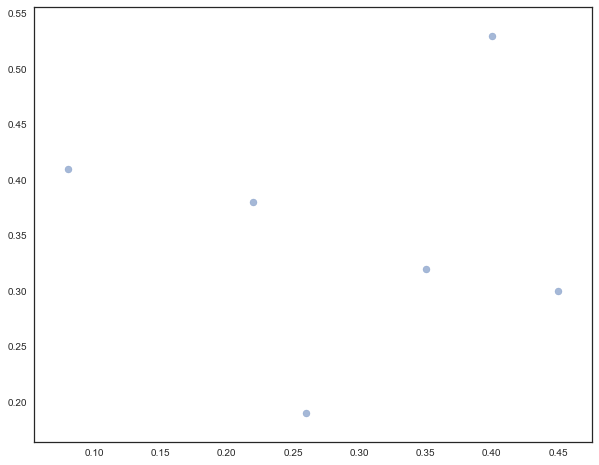

In [18]:
x=df_h.x_Coordinate
y=df_h.y_Coordinate
n=df_h.Points
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y,s=50, alpha=0.5);

On peut déjà deviner les points les plus proches  

la distance \textit{euclidienne} entre chaque couple de points se calcule comme suit:

\begin{equation} \label{eq:euc}
\mathrm{d}(\mathbf{x},\mathbf{y})= \sqrt{\sum_{i=1}^n (x_i-y_i)^2}
\end{equation}

In [19]:
df_h

,Points,x_Coordinate,y_Coordinate
0,p1,0.40,0.53
1,p2,0.22,0.38
2,p3,0.35,0.32
3,p4,0.26,0.19
4,p5,0.08,0.41
5,p6,0.45,0.30


$$
d(p_1,p_2)=\sqrt{(.4-.22)^2 + (.53-.38)^2}
$$

In [20]:
print(np.sqrt(((.4-.22)**2)+(.53-.38)**2))

0.234307490277


Rapidemnt;

In [21]:
from scipy.spatial.distance import squareform, pdist
df_dis_mtx1=pd.DataFrame(squareform(pdist(df_h.ix[:, 1:])), columns=df_h.Points.unique(), index=df_h.Points.unique())
df_dis_mtx1

,p1,p2,p3,p4,p5,p6
p1,0.000000,0.234307,0.215870,0.367696,0.341760,0.235372
p2,0.234307,0.000000,0.143178,0.194165,0.143178,0.243516
p3,0.215870,0.143178,0.000000,0.158114,0.284605,0.101980
p4,0.367696,0.194165,0.158114,0.000000,0.284253,0.219545
p5,0.341760,0.143178,0.284605,0.284253,0.000000,0.386005
p6,0.235372,0.243516,0.101980,0.219545,0.386005,0.000000


In [22]:
from sklearn.metrics.pairwise import euclidean_distances
df_dis_mtx=pd.DataFrame(euclidean_distances(df_h.ix[:, 1:],df_h.ix[:, 1:]), index=["p1","p2","p3","p4","p5","p6"])
df_dis_mtx.columns=["p1","p2","p3","p4","p5","p6"]
df_dis_mtx

,p1,p2,p3,p4,p5,p6
p1,0.000000,0.234307,0.215870,0.367696,0.341760,0.235372
p2,0.234307,0.000000,0.143178,0.194165,0.143178,0.243516
p3,0.215870,0.143178,0.000000,0.158114,0.284605,0.101980
p4,0.367696,0.194165,0.158114,0.000000,0.284253,0.219545
p5,0.341760,0.143178,0.284605,0.284253,0.000000,0.386005
p6,0.235372,0.243516,0.101980,0.219545,0.386005,0.000000


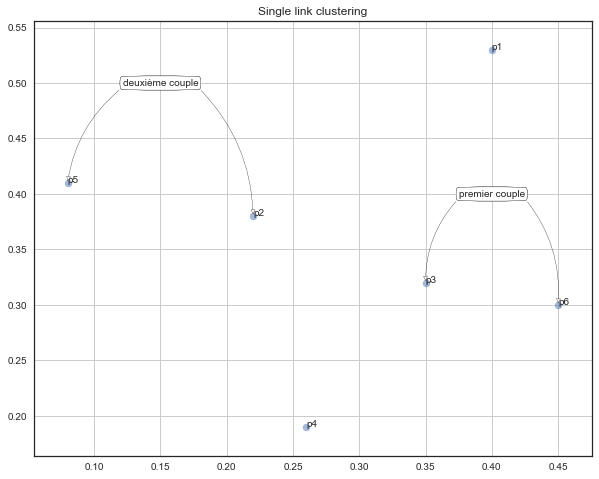

In [23]:
x=df_h.x_Coordinate
y=df_h.y_Coordinate
n=df_h.Points
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y,s=50, alpha=0.5)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))
plt.grid(True)

ann = ax.annotate("premier couple",
                  xy=(0.35 , .32), xycoords='data',
                  xytext=(0.4, 0.4), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 0.),
                                  fc="w"), 
                  )

ann = ax.annotate("premier couple",
                  xy=(0.45, 0.3), xycoords='data',
                  xytext=(0.4, 0.4), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  relpos=(1., 0.),
                                  fc="w"), 
                  )

ann = ax.annotate("deuxième couple",
                  xy=(0.08,0.41), xycoords='data',
                  xytext=(0.15, 0.5), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 0.),
                                  fc="w"), 
                  )

ann = ax.annotate("deuxième couple",
                  xy=(0.22,0.38), xycoords='data',
                  xytext=(0.15, 0.5), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  relpos=(1., 0.),
                                  fc="w"), 
                  )
 
plt.title("Single link clustering")
plt.show()

In [24]:
df_dis_mtx1

,p1,p2,p3,p4,p5,p6
p1,0.000000,0.234307,0.215870,0.367696,0.341760,0.235372
p2,0.234307,0.000000,0.143178,0.194165,0.143178,0.243516
p3,0.215870,0.143178,0.000000,0.158114,0.284605,0.101980
p4,0.367696,0.194165,0.158114,0.000000,0.284253,0.219545
p5,0.341760,0.143178,0.284605,0.284253,0.000000,0.386005
p6,0.235372,0.243516,0.101980,0.219545,0.386005,0.000000


# la notion de _Linkage_

## Question!

Est-ce que la distance entre le couple $\{3,6\}$ est plus petite que la distance entre les deux point $\{5,2\}$? Autrement dit, peut-on former un cluster avec le couple $\{3,6\}$ et le point $\{4\}$ avant de former le cluster formé par le couple $\{5,2\}$?

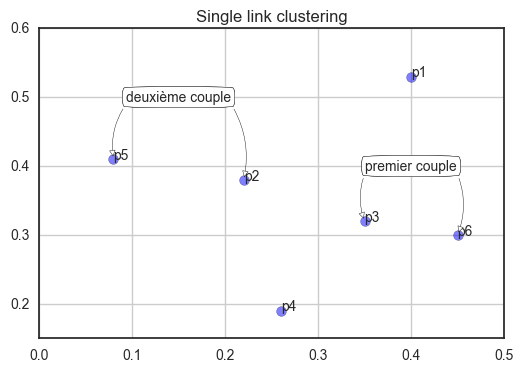

## Réponse:
Afin de répondre à cette question, la notion de **_Linkage _** à été dévelopée:

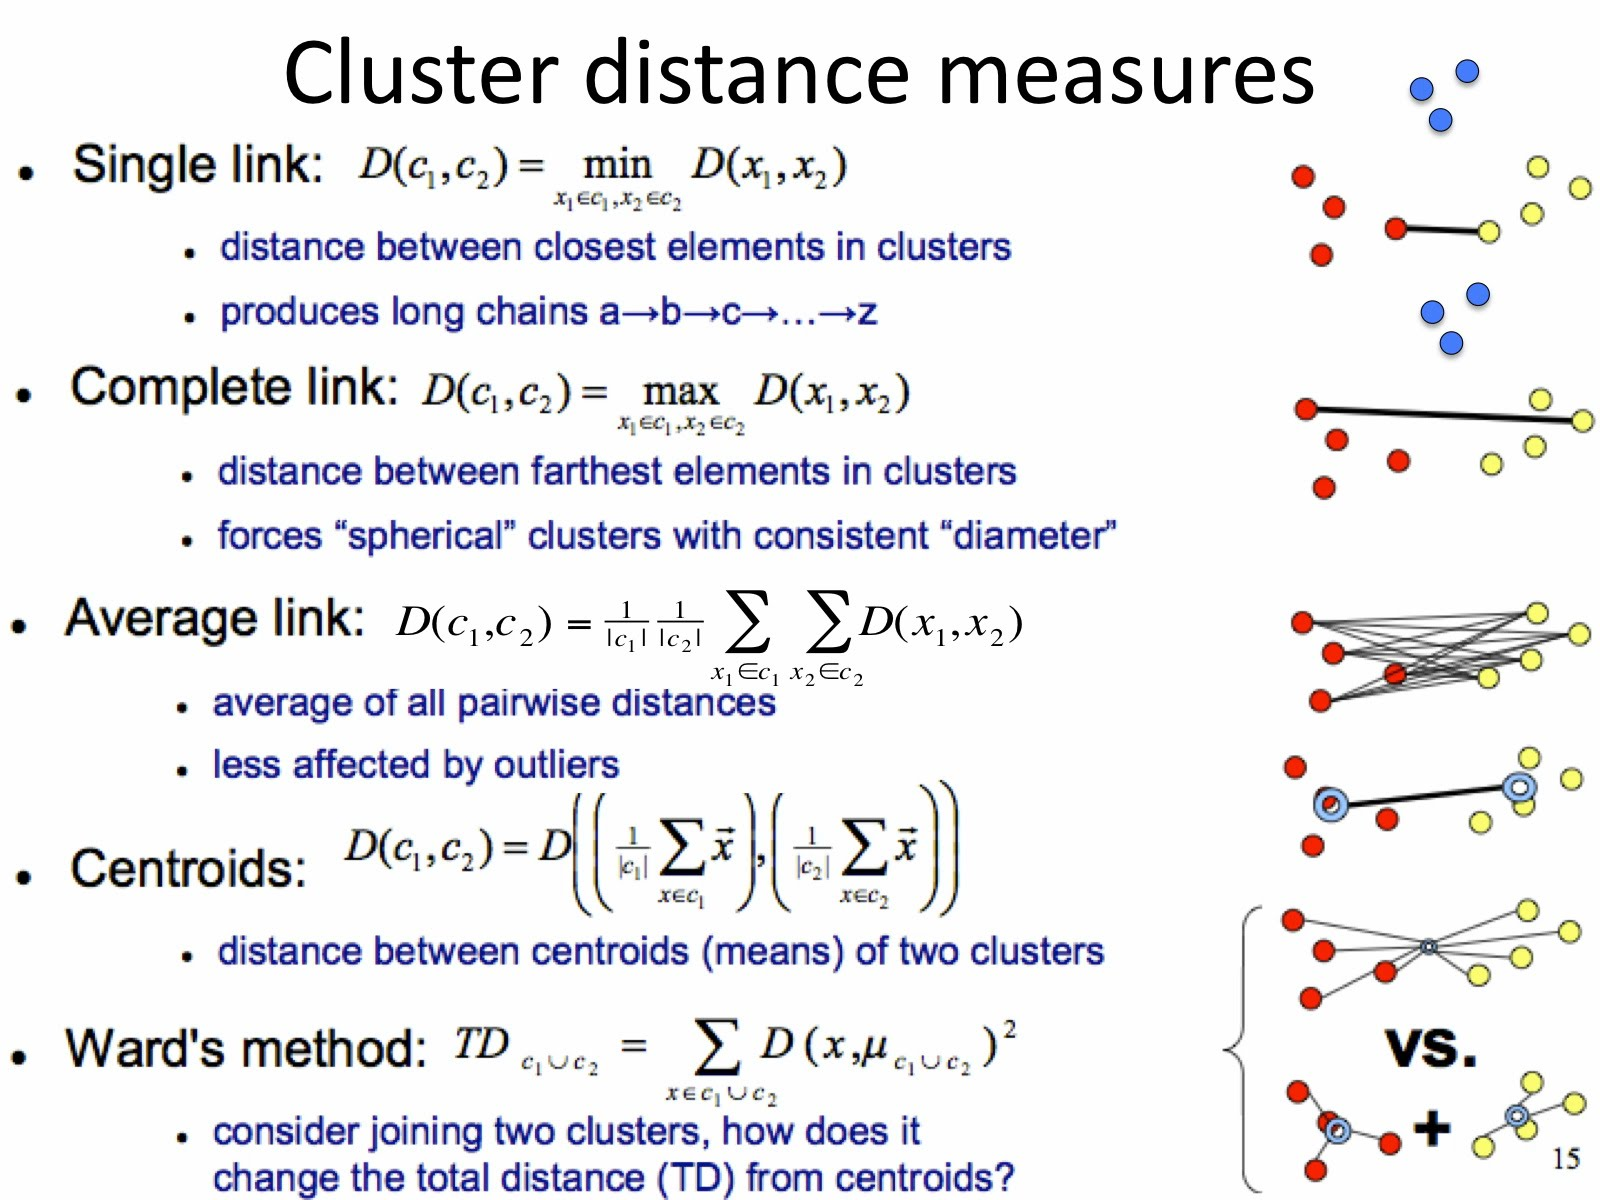

### _Single linkage_
Calculer toutes absence de ressemblance par paire entre les observations dans le groupe A et les observations dans le groupe B, et enregistrer la plus \textbf{petite} de ces dissemblances.

\begin{equation}
d_{single}(C_m,C_n)=min\{d(i,j)\}
\end{equation}


### _Complete linkage_
Calculer toutes absence de ressemblance par paire entre les observations dans le groupe A et les observations dans le groupe B, et enregistrer la plus \textbf{grande} de ces dissemblances.

\begin{equation} d_{complete}(C_m,C_n)=max\{d(i,j)\} \end{equation}

### _Average linkage_
Calculer toutes les dissemblances par paire entre les observations dans le groupe A et les observations dans le groupe B, et enregistrer la \textbf{moyenne} de ces dissemblances.

\begin{equation} d_{average}(C_m,C_n)=avg\{d(i,j)\} \end{equation}

### _Centroid linkage_
Dissemblance entre le centroïde du groupe A (un vecteur moyen de longueur p) et le centroïde du groupe B

\begin{equation} d_{centroid}(C_m,C_n)=d\{centroid(C_m);centroid(C_n)\} \end{equation}

/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:287: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')
/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:312: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')
/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:384: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='centroid', metric='euclidean')
/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:261: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix

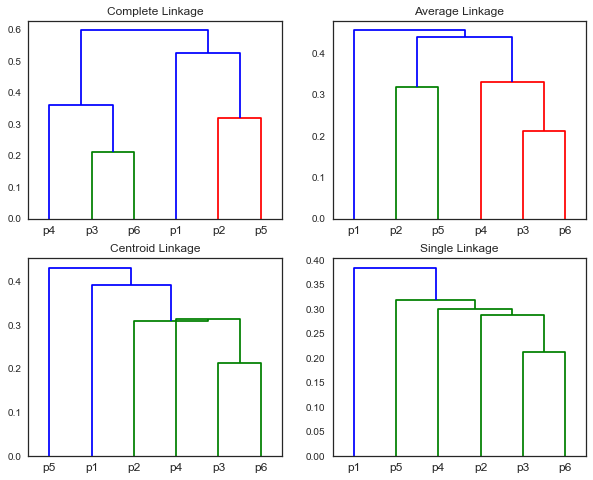

In [25]:
cut=.34
X=df_dis_mtx
fig, ([ax1,ax2],[ax3, ax4]) = plt.subplots(2,2, figsize=(10,8))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.centroid(X),hierarchy.single(X)], ['c1','c2','c3','c4'],
                                [ax1,ax2,ax3,ax4]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=cut,labels=df_dis_mtx.index)
ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Centroid Linkage')
ax4.set_title('Single Linkage');

/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:287: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')
/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:312: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')
/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:384: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='centroid', metric='euclidean')
/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix

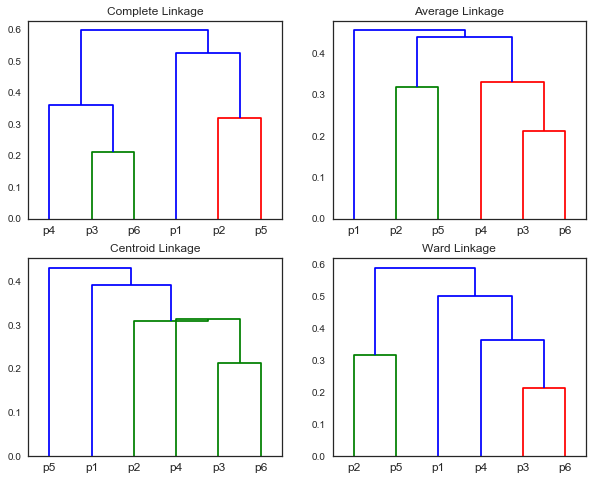

In [26]:
cut=.34
X=df_dis_mtx
fig, ([ax1,ax2],[ax3, ax4]) = plt.subplots(2,2, figsize=(10,8))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.centroid(X),hierarchy.ward(X)], ['c1','c2','c3','c4'],
                                [ax1,ax2,ax3,ax4]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=cut,labels=df_dis_mtx.index)
ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Centroid Linkage')
ax4.set_title('Ward Linkage');

/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:287: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')
/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:312: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')
/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:384: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='centroid', metric='euclidean')
/Users/nour/anaconda/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:261: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix

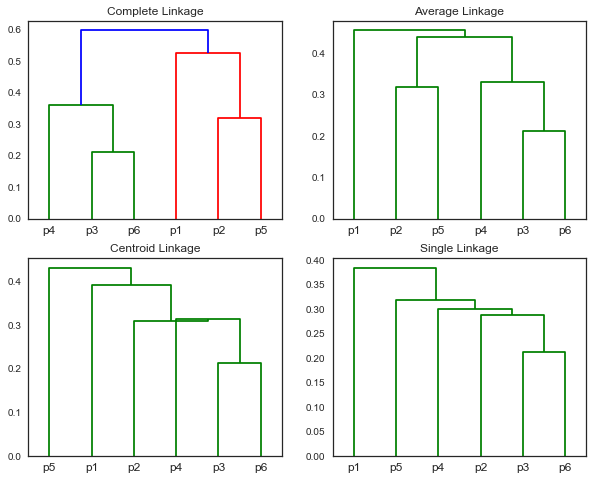

In [28]:
cut=.55
X=df_dis_mtx
fig, ([ax1,ax2],[ax3, ax4]) = plt.subplots(2,2, figsize=(10,8))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.centroid(X),hierarchy.single(X)], ['c1','c2','c3','c4'],
                                [ax1,ax2,ax3,ax4]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=cut,labels=df_dis_mtx.index)
ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Centroid Linkage')
ax4.set_title('Single Linkage');